# 02 • EDA of Crime
EDA is an iterative tool that would help us to look into the database and describe it's information.

In this EDA I analyse the data from **crime data/rates**.

## Content
1. Sources selected
2. Describe the data
3. Cleaning data
4. Missing values
5. Analysis and Visualization
6. Additional comments
7. Save clean databases
8. References

## 1. Sources selected

For more info look into the jupyter notebook `01_Datacollection.ipynb` of this repo.

### Crime

**Sources:**
- University of Maryland. (2021). [GTD compiled by University of Maryland](https://opendata.com.pk/dataset/pakistan-terror-attacks). Open Data Pakistan.

> This is monthly data for the period of 1974 to 2017; however, the original data comes from the [Global Terrorism Database of University of Maryland](https://www.start.umd.edu/gtd/) and I already asked to have access to the most updated information of this database, and I am waiting for a response.

## 2. Describe the data
Get the database:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import re

In [2]:
## To install Altair look the following link
##    https://altair-viz.github.io/getting_started/installation.html
# !pip install altair vega_datasets #<--To install using `pip`
# !conda install -c conda-forge altair vega_datasets #<--To install using `conda`

import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# Load dataset
file = "https://opendata.com.pk/dataset/2c5dbf99-a7ac-4ea8-9514-97131b73b6d8/resource/88b86f22-f4ef-4b8f-955e-bb90e2ad917f/download/preprocessed_metadata_pakistanterrorattacks.csv"
df = pd.read_csv(file)

In [4]:
# this is our database
df.head(3)

,Year,Month,Day,Country,Province,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties
0,1974,12,9,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Bombing/Explosion,0,2,USIS Center,,Government (Diplomatic),Explosives,2
1,1975,0,0,Pakistan,Punjab,South Asia,Rawalpindi,33.594013,73.069077,Bombing/Explosion,0,0,Pakistan Airlines Boeing 707,,Airports & Aircraft,Explosives,0
2,1975,2,8,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Assassination,1,0,"Hayat Mohammed Khan Sherpao, home minister",National Awami Party,Government (General),Firearms,1


Describing data with descriptive statistics:

In [5]:
# Variables
print("Variables:",list(df.columns),"\n")

# General information
df.info()

Variables: ['Year', 'Month', 'Day', 'Country', 'Province', 'Region', 'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Group', 'Target_type', 'Weapon_type', 'Casualties'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1829 non-null   int64  
 1   Month        1829 non-null   int64  
 2   Day          1829 non-null   int64  
 3   Country      1829 non-null   object 
 4   Province     1829 non-null   object 
 5   Region       1829 non-null   object 
 6   city         1829 non-null   object 
 7   latitude     1829 non-null   float64
 8   longitude    1829 non-null   float64
 9   AttackType   1829 non-null   object 
 10  Killed       1829 non-null   int64  
 11  Wounded      1829 non-null   int64  
 12  Target       1824 non-null   object 
 13  Group        1829 non-null   object 
 14  Target_type  1

In [6]:
## Quantitative variables
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualties
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,2007.936577,6.423182,15.431383,31.645755,69.948943,5.657736,11.854565,17.512302
std,7.693551,3.410344,8.749950,2.853523,2.686099,11.864473,25.054223,34.480983
min,1974.000000,0.000000,0.000000,24.891115,62.034140,0.000000,0.000000,0.000000
25%,2007.000000,4.000000,8.000000,29.552311,68.211555,0.000000,0.000000,2.000000
50%,2010.000000,6.000000,15.000000,32.800575,70.644798,2.000000,3.000000,6.000000
75%,2013.000000,9.000000,23.000000,33.997681,71.561043,6.000000,11.000000,17.000000
max,2017.000000,12.000000,31.000000,35.918091,74.531856,158.000000,351.000000,430.000000


In [7]:
# Unique terms per vaeriable (per column)
print("\nNumber of elements in the database",len(df))

pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'Column name', 0:'Unique terms'})


Number of elements in the database 1829


,Column name,Unique terms
0,Year,41
1,Month,13
2,Day,32
3,Country,1
4,Province,9
5,Region,1
6,city,199
7,latitude,447
8,longitude,446
9,AttackType,9


Looking into the variables:

In [8]:
# Date
print("- The range of `years`  goes from  {0} to {1}.".format(df.Year.min(), df.Year.max()))
print("- The range of `months` goes from  {0} to {1}.".format(df.Month.min(), df.Month.max()))
print("- The range of `days`   goes from  {0} to {1}.".format(df.Day.min(), df.Day.max()))

- The range of `years`  goes from  1974 to 2017.
- The range of `months` goes from  0 to 12.
- The range of `days`   goes from  0 to 31.


In [9]:
# country
print("- The country is {0} and the region is {1}.".format(df.Country.unique()[0], df.Region.unique()[0]))


- The country is Pakistan and the region is South Asia.


In [10]:
# province
print("\n- Provinces:")
for i in df.Province.unique():
    print("    * "+i)


- Provinces:
    * North-West Frontier Province
    * Punjab
    * Islamabad Capital Territory
    * Sindh
    * Federally Administered Tribal Areas
    * Balochistan
    * Khyber Pakhtunkhwa
    * Azad Kashmir
    * Gilgit-Baltistan


In [11]:
# Date
print("- The range of `latitude` goes from  {0} to {1}.".format(df.latitude.min(), df.latitude.max()))
print("- The range of `longitud` goes from  {0} to {1}.".format(df.longitude.min(), df.longitude.max()))

- The range of `latitude` goes from  24.891115 to 35.918091.
- The range of `longitud` goes from  62.03414 to 74.531856.


In [12]:
# Attack type

print("\n- AttackType:")
for i in df.AttackType.unique():
    print("    * "+i)


- AttackType:
    * Bombing/Explosion
    * Assassination
    * Unarmed Assault
    * Armed Assault
    * Facility/Infrastructure Attack
    *  
    * Hijacking
    * Hostage Taking (Kidnapping)
    * Hostage Taking (Barricade Incident)


In [13]:
# Kills, Wounded and Casualities
print("- The range of `killed`      goes from  {0} to {1}, and it's average is {2}.".format(df.Killed.min(), df.Killed.max(), np.round(df.Killed.mean(),2)))
print("- The range of `wounded`     goes from  {0} to {1}, and it's average is {2}.".format(df.Wounded.min(), df.Wounded.max(),  np.round(df.Wounded.mean(),2)))
print("- The range of `casualities` goes from  {0} to {1}, and it's average is {2}.".format(df.Casualties.min(), df.Casualties.max(),  np.round(df.Casualties.mean(),2)))

- The range of `killed`      goes from  0 to 158, and it's average is 5.66.
- The range of `wounded`     goes from  0 to 351, and it's average is 11.85.
- The range of `casualities` goes from  0 to 430, and it's average is 17.51.


In [14]:
# Target type

print("\n- Target_type:")
for i in df.Target_type.unique():
    print("    * "+i)


- Target_type:
    * Government (Diplomatic)
    * Airports & Aircraft
    * Government (General)
    * Terrorists/Non-State Militia
    * Police
    * Private Citizens & Property
    * Business
    * Transportation
    * Utilities
    * Religious Figures/Institutions
    * Military
    * Violent Political Party
    * Educational Institution
    * Journalists & Media
    *  
    * Food or Water Supply
    * Tourists
    * Telecommunication
    * NGO
    * Maritime


In [15]:
# Weapon_type

print("\n- Weapon_type:")
for i in df.Weapon_type.unique():
    print("    * "+i)


- Weapon_type:
    * Explosives
    * Firearms
    * Melee
    *  
    * Incendiary
    * Chemical
    * Other


## 3. Missing values

In [16]:
# Look for missing values
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Province       0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         5
Group          0
Target_type    0
Weapon_type    0
Casualties     0
dtype: int64

In [55]:
# In column `Target` changed `NaN` for `Unidentified`
df['Target'].fillna("Unidentifiede", inplace = True)

# Look againg for missing values
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Province       0
Region         0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
Casualties     0
dtype: int64

## 4. Cleaning data


In [64]:
df.head(10)

,Year,Month,Day,Country,Province,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties
0,1974,12,9,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Bombing/Explosion,0,2,USIS Center,,Government (Diplomatic),Explosives,2
1,1975,0,0,Pakistan,Punjab,South Asia,Rawalpindi,33.594013,73.069077,Bombing/Explosion,0,0,Pakistan Airlines Boeing 707,,Airports & Aircraft,Explosives,0
2,1975,2,8,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Assassination,1,0,"Hayat Mohammed Khan Sherpao, home minister",National Awami Party,Government (General),Firearms,1
3,1976,10,11,Pakistan,Islamabad Capital Territory,South Asia,Islamabad,33.671638,73.056068,Bombing/Explosion,1,2,Syrian Embassy,Abu Nidal Organization (ANO),Government (Diplomatic),Firearms,3
4,1978,8,5,Pakistan,Islamabad Capital Territory,South Asia,Islamabad,33.671638,73.056068,Bombing/Explosion,4,0,Palestine Liberation Org. office,Abu Nidal Organization (ANO),Terrorists/Non-State Militia,Firearms,4
5,1979,6,26,Pakistan,Islamabad Capital Territory,South Asia,Islamabad,33.671638,73.056068,Unarmed Assault,0,2,Embassy card,,Government (Diplomatic),Melee,2
6,1980,5,8,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Bombing/Explosion,17,18,Police station,Kabul Government Agents,Police,Explosives,35
7,1981,9,25,Pakistan,Punjab,South Asia,Lahore,31.505470,74.342880,Assassination,2,2,Chaudly Yahur Elahi and unk (former minister a...,Al-Zulfikar,Government (General),Firearms,4
8,1982,8,2,Pakistan,Punjab,South Asia,Lahore,31.505470,74.342880,Bombing/Explosion,0,8,Lahore Airport,Al-Zulfikar,Airports & Aircraft,Explosives,8
9,1983,2,19,Pakistan,Punjab,South Asia,,31.090612,72.359520,Bombing/Explosion,0,0,Home of honorary French consul,,Government (Diplomatic),Explosives,0


In [102]:
# Observations with `Month`= 0 
df[df['Month']==0]

,Year,Month,Day,Country,Province,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties
1,1975,0,0,Pakistan,Punjab,South Asia,Rawalpindi,33.594013,73.069077,Bombing/Explosion,0,0,Pakistan Airlines Boeing 707,,Airports & Aircraft,Explosives,0


In [120]:
# Replace `Month` = 0 to 1
df['Month'][1] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
# Observations with `Day`= 0 
df[df['Day']==0]

,Year,Month,Day,Country,Province,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties


In [119]:
# Replace `Day` = 0 to 1
for i in df[df['Day']==0].index:
    df['Day'][i] = 1

In [139]:
# get colum of dates
my_dates = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.Day))
df['date'] = my_dates

## 5. Analysis and Visualization

In [140]:
df.head(3)

,Year,Month,Day,Country,Province,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties,Dates,date
0,1974,12,9,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Bombing/Explosion,0,2,USIS Center,,Government (Diplomatic),Explosives,2,1974-12-09,1974-12-09
1,1975,1,1,Pakistan,Punjab,South Asia,Rawalpindi,33.594013,73.069077,Bombing/Explosion,0,0,Pakistan Airlines Boeing 707,,Airports & Aircraft,Explosives,0,1975-01-01,1975-01-01
2,1975,2,8,Pakistan,North-West Frontier Province,South Asia,Peshawar,34.006004,71.537430,Assassination,1,0,"Hayat Mohammed Khan Sherpao, home minister",National Awami Party,Government (General),Firearms,1,1975-02-08,1975-02-08


### Killed and wounded along time

In [212]:
source = df[['date', 'Killed', 'Wounded']].set_index('date').stack()
source = pd.DataFrame(source).reset_index().rename(columns={'level_1':'Type', 0:'Incidents'})
source

,date,Type,Incidents
0,1974-12-09,Killed,0
1,1974-12-09,Wounded,2
2,1975-01-01,Killed,0
3,1975-01-01,Wounded,0
4,1975-02-08,Killed,1
...,...,...,...
3653,2017-11-25,Wounded,5
3654,2017-12-01,Killed,12
3655,2017-12-01,Wounded,37
3656,2017-12-17,Killed,11


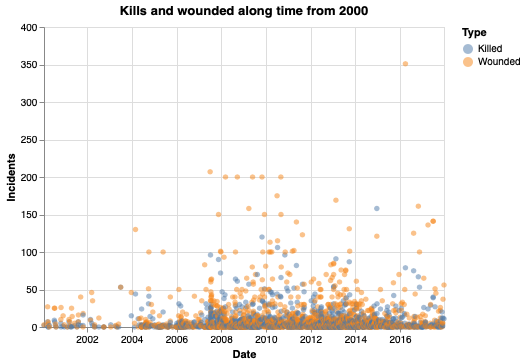

In [215]:
alt.Chart(source[source.date>="2000-01-01"].reset_index(drop=True)).mark_circle(opacity=.5).encode(
    alt.X('date:T', title="Date"),
    alt.Y('Incidents'),
    alt.Color('Type'),
    tooltip=['Type','Incidents','date:T']
).properties(
    title="Kills and wounded along time from 2000"
)


# Casualties along time

In [219]:
source = df[['date', 'Casualties']]
source

,date,Casualties
0,1974-12-09,2
1,1975-01-01,0
2,1975-02-08,1
3,1976-10-11,3
4,1978-08-05,4
...,...,...
1824,2017-11-15,20
1825,2017-11-24,9
1826,2017-11-25,6
1827,2017-12-01,49


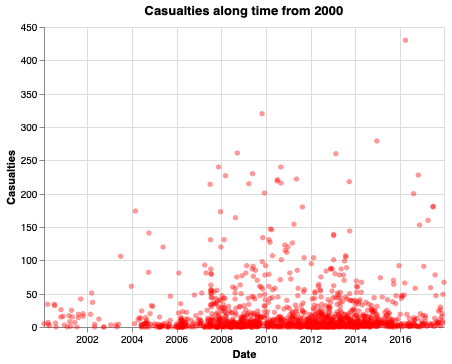

In [221]:
alt.Chart(source[source.date>="2000-01-01"].reset_index(drop=True)).mark_circle(color='red', opacity=.4).encode(
    alt.X('date:T', title="Date"),
    alt.Y('Casualties:Q'),
    tooltip=['Casualties', 'date']
).properties(
    title="Casualties from 2000"
)

In [234]:
source = pd.pivot_table(df, index=["Year", "Month"], values=["Casualties"],
                        aggfunc=np.sum, fill_value=0).reset_index()

# get colum of dates
my_dates = pd.to_datetime(dict(year=source.Year, month=source.Month, day=1))
source['date'] = my_dates
source

,Year,Month,Casualties,date
0,1974,12,2,1974-12-01
1,1975,1,0,1975-01-01
2,1975,2,1,1975-02-01
3,1976,10,3,1976-10-01
4,1978,8,4,1978-08-01
...,...,...,...,...
319,2017,8,60,2017-08-01
320,2017,9,47,2017-09-01
321,2017,10,70,2017-10-01
322,2017,11,51,2017-11-01


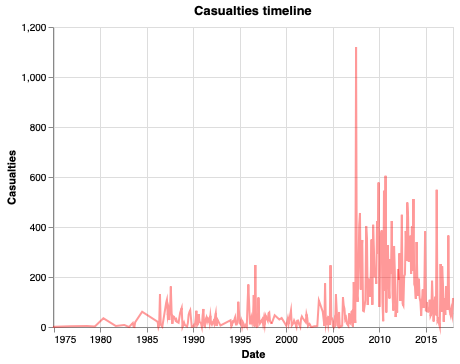

In [237]:
alt.Chart(source).mark_line(color='red', opacity=.4).encode(
    alt.X('date:T', title="Date"),
    alt.Y('Casualties:Q'),
    tooltip=['Casualties', 'date']
).properties(
    title="Casualties timeline"
)

# Killed, Wounded and Casualities by month and year

In [203]:
source = pd.pivot_table(df, index=["Year", "Month"], values=['Killed', 'Wounded', "Casualties"],
                        aggfunc=np.sum, fill_value=0).reset_index()
source

,Year,Month,Casualties,Killed,Wounded
0,1974,12,2,0,2
1,1975,1,0,0,0
2,1975,2,1,1,0
3,1976,10,3,1,2
4,1978,8,4,4,0
...,...,...,...,...,...
319,2017,8,60,12,48
320,2017,9,47,7,40
321,2017,10,70,10,60
322,2017,11,51,36,15


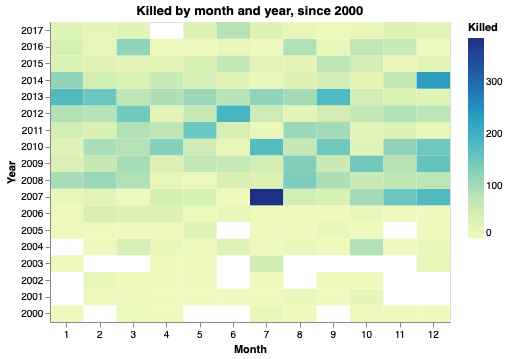

In [206]:
alt.Chart(source[source.Year>=2000]).mark_rect().encode(
    alt.X("Month:O", axis = alt.Axis(labelAngle = 0)),
    alt.Y('Year:O', sort="-y"),
    alt.Color('Killed:Q'),
    tooltip=['Year', 'Month', 'Killed']
).properties(
    width=400, height=300,
    title="Killed by month and year, since 2000"
)

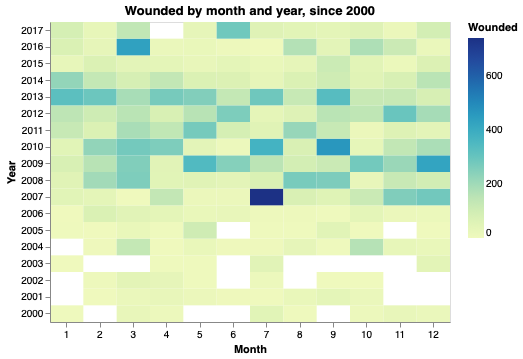

In [207]:
alt.Chart(source[source.Year>=2000]).mark_rect().encode(
    alt.X("Month:O", axis = alt.Axis(labelAngle = 0)),
    alt.Y('Year:O', sort="-y"),
    alt.Color('Wounded:Q'),
    tooltip=['Year', 'Month', 'Wounded']
).properties(
    width=400, height=300,
    title="Wounded by month and year, since 2000"
)

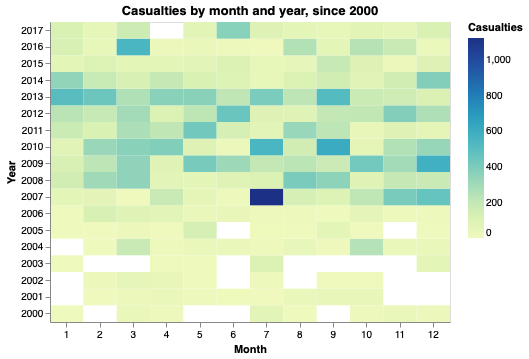

In [205]:
alt.Chart(source[source.Year>=2000]).mark_rect().encode(
    alt.X("Month:O", axis = alt.Axis(labelAngle = 0)),
    alt.Y('Year:O', sort="-y"),
    alt.Color('Casualties:Q'),
    tooltip=['Year', 'Month', 'Casualties']
).properties(
    width=400, height=300,
    title="Casualties by month and year, since 2000"
)

### Killed vs Wounded, by type of attack

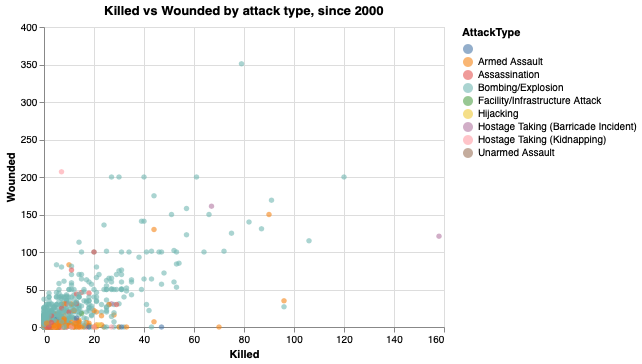

In [225]:
alt.Chart(df[df.Year>=2000]).mark_circle(opacity=.6).encode(
    alt.X('Killed'),
    alt.Y('Wounded'),
    alt.Color('AttackType'),
    tooltip=['Killed', 'Wounded', 'AttackType']
).properties(
    title = "Killed vs Wounded by attack type, since 2000"
)

### Killed vs Wounded, by type of weapon

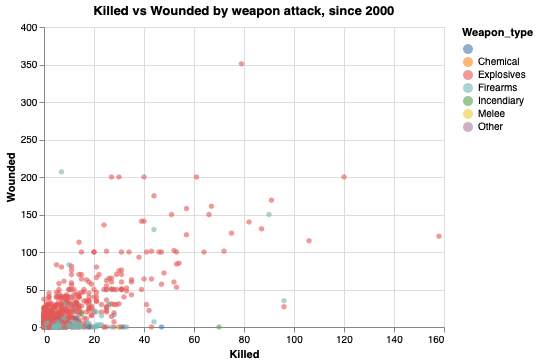

In [227]:
alt.Chart(df[df.Year>=2000]).mark_circle(opacity=.6).encode(
    alt.X('Killed'),
    alt.Y('Wounded'),
    alt.Color('Weapon_type'),
    tooltip=['Killed', 'Wounded', 'Weapon_type']
).properties(
    title = "Killed vs Wounded by weapon attack, since 2000"
)

## 6. Additional comments
TO-DO


## 7. Save the clean database
TO-DO

## 8. References

Database
- University of Maryland. (2021). [GTD compiled by University of Maryland](https://opendata.com.pk/dataset/pakistan-terror-attacks). Open Data Pakistan.

> This is monthly data for the period of 1974 to 2017; however, the original data comes from the [Global Terrorism Database of University of Maryland](https://www.start.umd.edu/gtd/) and I already asked to have access to the most updated information of this database, and I am waiting for a response.

EDA
- K. Katari. (Aug 21, 2020).[Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14). Towards Data Science.
- J.M. Reid. (Oct 14, 2021). [13 ways to access data in Python](https://towardsdatascience.com/13-ways-to-access-data-in-python-bac5683e0063). Towards Data Science.
- A.K. Garg, V. Cuspinera-Contreras, Y. Qian. (Oct 2020). [Bike Sharing Machine Learning Model, EDA section](https://github.com/vcuspinera/MDS_Bike_Sharing/blob/master/eda/EDA.ipynb).\n",